In [8]:
%cd D:\\gejun\\Documents\\Git\\YuEbaoPrediction\\LSTM_prediction

D:\gejun\Documents\Git\YuEbaoPrediction\LSTM_prediction


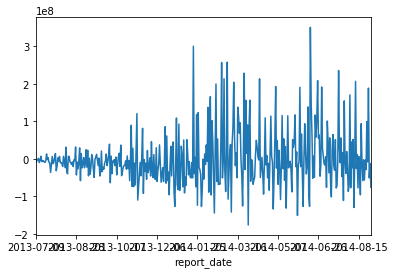

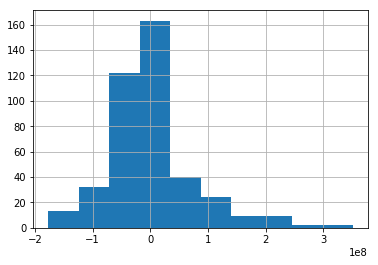

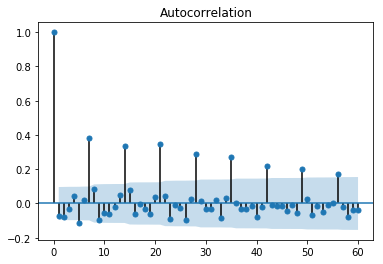

(array([   2.30277948,    4.98116396,    5.42993007,    6.21346404,
          11.50646297,   11.72537105,   74.72436376,   77.91330312,
          81.86560971,   83.21337029,   84.69500172,   84.86521252,
          85.8449176 ,  134.91233115,  137.48696314,  139.02918738,
         139.02941159,  139.40707215,  141.12496674,  141.71962552,
         194.11428363,  194.98501089,  198.8565241 ,  198.91655377,
         199.20861223,  203.40464081,  203.68888189,  241.29194926,
         241.39109503,  241.9381972 ,  242.34093566,  242.51882008,
         246.00558517,  246.40362483,  279.55398035,  279.56092774,
         279.96394329,  280.44087786,  280.56771636,  283.63196045]),
 array([  1.29142719e-01,   8.28617286e-02,   1.42890162e-01,
          1.83763727e-01,   4.22132815e-02,   6.83834611e-02,
          1.63136193e-13,   1.28465378e-13,   6.87873284e-14,
          1.17388347e-13,   1.81169192e-13,   4.83124045e-13,
          8.65971863e-13,   7.25683164e-22,   7.20097757e-22,
        

In [20]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import sys
from statsmodels.tsa.arima_model import ARMA

def mape(y_true, y_pred):
     return np.mean(np.abs((y_true - y_pred) / y_true))

df = pd.read_csv('../file/Gridsearchtask.csv', index_col='report_date')

# df['report_date'] = pd.to_datetime(df['report_date'], errors='coerce')

lstm_residual = df['total_redeem_amt']-df['LSTM']
lstm_residual.describe()

lstm_residual.plot()
plt.show()

# 直方图 是否正态分布
lstm_residual.hist()
plt.show()

# autocorrelation
plot_acf(lstm_residual, ax=plt.gca(), lags=60)
plt.show()

# LBQ 检验
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(lstm_residual, lags=None, boxpierce=True)
